In [ ]:
# Question 1-(a)

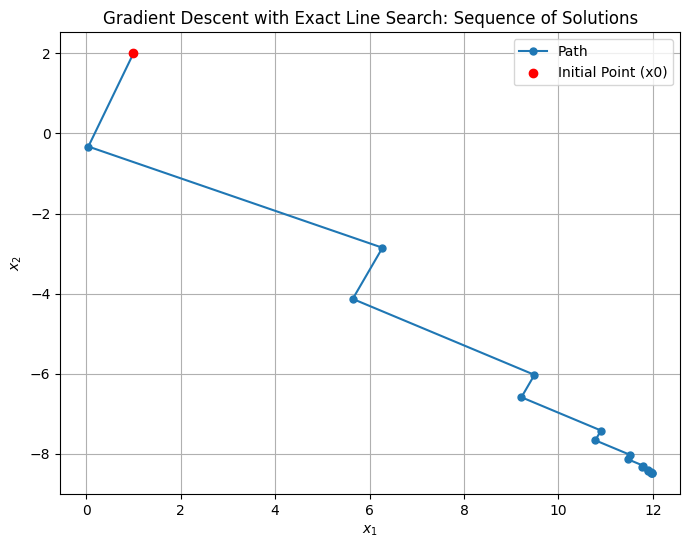

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) and its gradient
def f(x):
    return 0.5 * x.T @ P @ x + q.T @ x + np.log(np.exp(-2 * x[0]) + np.exp(-x[1]))

def grad_f(x):
    exp_term_1 = np.exp(-2 * x[0])
    exp_term_2 = np.exp(-x[1])
    common_term = 1 / (exp_term_1 + exp_term_2)
    gradient = P @ x + q + np.array([-2 * exp_term_1, -exp_term_2]) * common_term
    return gradient

# Exact line search to find step size
def exact_line_search(x, d):
    # Solve for alpha by minimizing along the direction d
    alpha_num = -grad_f(x).T @ d
    alpha_denom = d.T @ P @ d
    return alpha_num / alpha_denom

# Gradient descent with exact line search
def gradient_descent(x0, tol=1e-2, max_iter=1500):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad  # Descent direction
        alpha = exact_line_search(x, d)  # Step size
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

# Parameters
P = np.array([[3, 4], [4, 6]])
q = np.array([-2, 4])
x0 = np.array([1.0, 2.0])

# Run gradient descent
x_sequence = gradient_descent(x0)

# Plotting the sequence of solutions
plt.figure(figsize=(8, 6))
plt.plot(x_sequence[:, 0], x_sequence[:, 1], marker='o', linestyle='-', markersize=5, label='Path')
plt.scatter(x0[0], x0[1], color='red', label='Initial Point (x0)', zorder=5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent with Exact Line Search: Sequence of Solutions')
plt.legend()
plt.grid(True)
plt.show()


Here, the plot of the sequence of solutions xk is generated using the gradient descent method with exact line search, starting from the initial point x0 = [1, 2]ᵀ. The path shows how the solution converges towards the minimum.

In [ ]:
# End of Question 1-(a)

In [ ]:
# Question 1-(b)

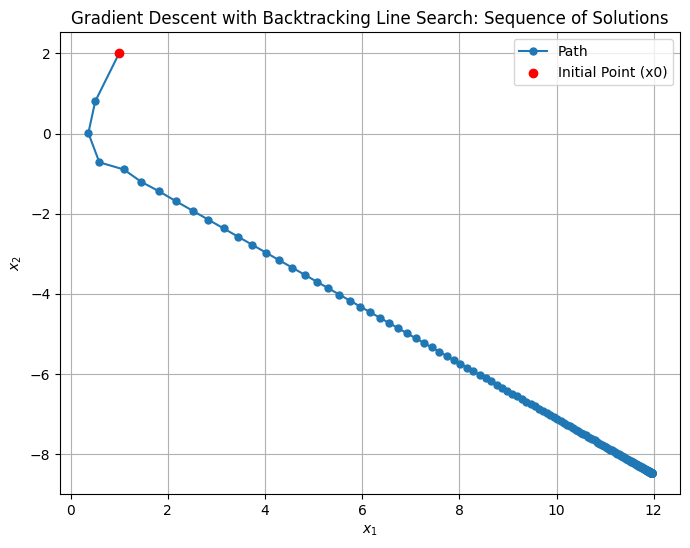

In [ ]:
# Backtracking line search function
def backtracking_line_search(x, d, alpha_init=0.15, beta=0.8, gamma=0.7):
    alpha = alpha_init
    while f(x + alpha * d) > f(x) + gamma * alpha * grad_f(x).T @ d:
        alpha *= beta
    return alpha

# Gradient descent with backtracking line search
def gradient_descent_backtracking(x0, tol=1e-2, max_iter=1000, alpha_init=0.15, beta=0.8, gamma=0.7):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad  # Descent direction
        alpha = backtracking_line_search(x, d, alpha_init, beta, gamma)  # Step size
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

# Run gradient descent with backtracking line search
x_sequence_backtracking = gradient_descent_backtracking(x0)

# Plotting the sequence of solutions
plt.figure(figsize=(8, 6))
plt.plot(x_sequence_backtracking[:, 0], x_sequence_backtracking[:, 1], marker='o', linestyle='-', markersize=5, label='Path')
plt.scatter(x0[0], x0[1], color='red', label='Initial Point (x0)', zorder=5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent with Backtracking Line Search: Sequence of Solutions')
plt.legend()
plt.grid(True)
plt.show()


Here is the plot showing the seqeunce of solutions xk generated using the gradient descent with backtracking line search. The method uses the parameters:-



*   α = 0.15
*   γ = 0.7
*   β = 0.8

Starting from x0 = [1, 2]ᵀ, the algorithm adaptively selects the step size at each iteration based on the backtracking condition, ensuring sufficient descent in the function value.

In [ ]:
# End of Question 1-(b)

In [ ]:
# Optimal point calculation for part (a) and part (b)

In [ ]:
import numpy as np

# Redefine the problem parameters and functions due to code reset
P = np.array([[3, 4], [4, 6]])
q = np.array([-2, 4])
x0 = np.array([1.0, 2.0])

def f(x):
    return 0.5 * x.T @ P @ x + q.T @ x + np.log(np.exp(-2 * x[0]) + np.exp(-x[1]))

def grad_f(x):
    exp_term_1 = np.exp(-2 * x[0])
    exp_term_2 = np.exp(-x[1])
    common_term = 1 / (exp_term_1 + exp_term_2)
    gradient = P @ x + q + np.array([-2 * exp_term_1, -exp_term_2]) * common_term
    return gradient

def exact_line_search(x, d):
    alpha_num = -grad_f(x).T @ d
    alpha_denom = d.T @ P @ d
    return alpha_num / alpha_denom

def gradient_descent(x0, tol=1e-2, max_iter=1000):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad
        alpha = exact_line_search(x, d)
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

def backtracking_line_search(x, d, alpha_init=0.15, beta=0.8, gamma=0.7):
    alpha = alpha_init
    while f(x + alpha * d) > f(x) + gamma * alpha * grad_f(x).T @ d:
        alpha *= beta
    return alpha

def gradient_descent_backtracking(x0, tol=1e-2, max_iter=1000, alpha_init=0.15, beta=0.8, gamma=0.7):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad
        alpha = backtracking_line_search(x, d, alpha_init, beta, gamma)
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

# Run both methods
x_sequence_exact = gradient_descent(x0)
x_sequence_backtracking = gradient_descent_backtracking(x0)

# Extract optimal points
optimal_point_exact = x_sequence_exact[-1]
optimal_point_backtracking = x_sequence_backtracking[-1]

optimal_point_exact, optimal_point_backtracking


(array([11.98038651, -8.48652023]), array([11.96500079, -8.47574553]))

(a) The optimal point found with Exact Line Search is given by:-

[11.9804, -8.4865]


(b) The optimal point found by Backtracking Line Search is given by:-

[11.9650, -8.4757]

In [ ]:
# Question 2

In [ ]:
# Redefine all necessary components after code reset
import numpy as np

# Define the new P matrix and other parameters
P_new = np.array([[5.005, 4.995], [4.995, 5.005]])
q = np.array([-2, 4])
x0 = np.array([1.0, 2.0])

# Redefine functions with the new P matrix
def f_new(x):
    return 0.5 * x.T @ P_new @ x + q.T @ x + np.log(np.exp(-2 * x[0]) + np.exp(-x[1]))

def grad_f_new(x):
    exp_term_1 = np.exp(-2 * x[0])
    exp_term_2 = np.exp(-x[1])
    common_term = 1 / (exp_term_1 + exp_term_2)
    gradient = P_new @ x + q + np.array([-2 * exp_term_1, -exp_term_2]) * common_term
    return gradient

def exact_line_search_new(x, d):
    alpha_num = -grad_f_new(x).T @ d
    alpha_denom = d.T @ P_new @ d
    return alpha_num / alpha_denom

def gradient_descent_new(x0, tol=1e-2, max_iter=1000):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f_new(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad
        alpha = exact_line_search_new(x, d)
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

def backtracking_line_search_new(x, d, alpha_init=0.15, beta=0.8, gamma=0.7):
    alpha = alpha_init
    while f_new(x + alpha * d) > f_new(x) + gamma * alpha * grad_f_new(x).T @ d:
        alpha *= beta
    return alpha

def gradient_descent_backtracking_new(x0, tol=1e-2, max_iter=1000, alpha_init=0.15, beta=0.8, gamma=0.7):
    x = x0
    x_sequence = [x0]
    for _ in range(max_iter):
        grad = grad_f_new(x)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad
        alpha = backtracking_line_search_new(x, d, alpha_init, beta, gamma)
        x = x + alpha * d
        x_sequence.append(x)
    return np.array(x_sequence)

# Run both methods with the new matrix P
x_sequence_exact_new = gradient_descent_new(x0)
x_sequence_backtracking_new = gradient_descent_backtracking_new(x0)

# Extract optimal points
optimal_point_exact_new = x_sequence_exact_new[-1]
optimal_point_backtracking_new = x_sequence_backtracking_new[-1]

optimal_point_exact_new, optimal_point_backtracking_new


(array([ 249.26245648, -249.36266955]), array([ 194.09541895, -194.19541895]))

The Optimal Points obtained in the new matrix are as follows:-



*   Exact Line Search = [249.26245, -249.36266]
*   Backtracking Line Search = [194.0954, -194.19541]



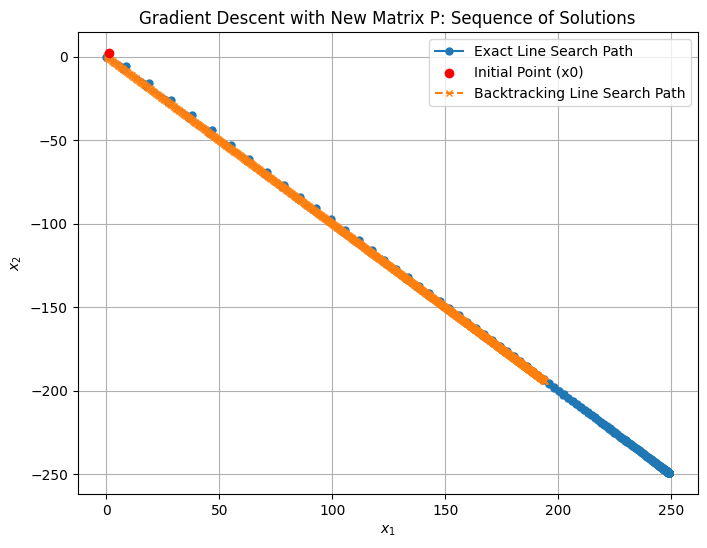

In [ ]:
import matplotlib.pyplot as plt

# Plotting the sequence of solutions for both methods with the new matrix P

# Exact line search path
plt.figure(figsize=(8, 6))
plt.plot(x_sequence_exact_new[:, 0], x_sequence_exact_new[:, 1], marker='o', linestyle='-', markersize=5, label='Exact Line Search Path')
plt.scatter(x0[0], x0[1], color='red', label='Initial Point (x0)', zorder=5)

# Backtracking line search path
plt.plot(x_sequence_backtracking_new[:, 0], x_sequence_backtracking_new[:, 1], marker='x', linestyle='--', markersize=5, label='Backtracking Line Search Path')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent with New Matrix P: Sequence of Solutions')
plt.legend()
plt.grid(True)
plt.show()


Here the Exact Line Search path is marked with circles and a solid line and the Backtracking Line Search path is marked with crosses and a dashed line.

Both the methods start at the initial point x0 = [1, 2]ᵀ which is marked with red on the graph.

In [ ]:
# End of Question 2